In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fb = pd.read_csv('../data/facebook.csv')
ms = pd.read_csv('../data/microsoft.csv')

## Create a new column in the DataFrame (1) - Price difference

In [4]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [5]:
#Your turn to create PriceDiff in the DataFrame ms
print(ms.tail())
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']
print(ms.tail())


           Date       Open       High        Low      Close  Adj Close  \
775  2018-01-30  93.300003  93.660004  92.099998  92.739998  92.306389   
776  2018-01-31  93.750000  95.400002  93.510002  95.010002  94.565781   
777  2018-02-01  94.790001  96.070000  93.580002  94.260002  93.819290   
778  2018-02-02  93.639999  93.970001  91.500000  91.779999  91.350883   
779  2018-02-05  90.559998  93.239998  88.000000  88.000000  87.588554   

       Volume  
775  38635100  
776  48756300  
777  47227900  
778  47867800  
779  51031500  
           Date       Open       High        Low      Close  Adj Close  \
775  2018-01-30  93.300003  93.660004  92.099998  92.739998  92.306389   
776  2018-01-31  93.750000  95.400002  93.510002  95.010002  94.565781   
777  2018-02-01  94.790001  96.070000  93.580002  94.260002  93.819290   
778  2018-02-02  93.639999  93.970001  91.500000  91.779999  91.350883   
779  2018-02-05  90.559998  93.239998  88.000000  88.000000  87.588554   

       Volume 

In [6]:
#Run this code to display the price difference of Microsoft on 2015-01-05
ms = ms.set_index('Date')
print(ms.index)

print(ms['PriceDiff'].loc['2015-01-05'])

Index(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
       '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05'],
      dtype='object', name='Date', length=780)
-0.6799999999999997


** Expected Output: ** -0.68

## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [15]:
#Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff'] /fb['Close']

In [8]:
#Your turn to create a new column Return in the DataFrame MS
ms['Return'] = ms['PriceDiff'] / ms['Close']

In [9]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


** Expected Output: ** -0.0146773142811

## Create a new column in the DataFrame using List Comprehension - Direction

In [10]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [11]:
# Your turn to create a new column Direction for MS

ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index ]
print(ms.head())

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2014-12-31  46.730000  47.439999  46.450001  46.450001  42.848763  21552500   
2015-01-02  46.660000  47.419998  46.540001  46.759998  43.134731  27913900   
2015-01-05  46.369999  46.730000  46.250000  46.330002  42.738068  39673900   
2015-01-06  46.380001  46.750000  45.540001  45.650002  42.110783  36447900   
2015-01-07  45.980000  46.459999  45.490002  46.230000  42.645817  29114100   

            PriceDiff    Return  Direction  
Date                                        
2014-12-31   0.309997  0.006674          1  
2015-01-02  -0.429996 -0.009196          0  
2015-01-05  -0.680000 -0.014677          0  
2015-01-06   0.579998  0.012705          1  
2015-01-07   1.360000  0.029418          1  


In [12]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

In [16]:
print(fb.index)
fb = fb.set_index('Date')

RangeIndex(start=0, stop=780, step=1)


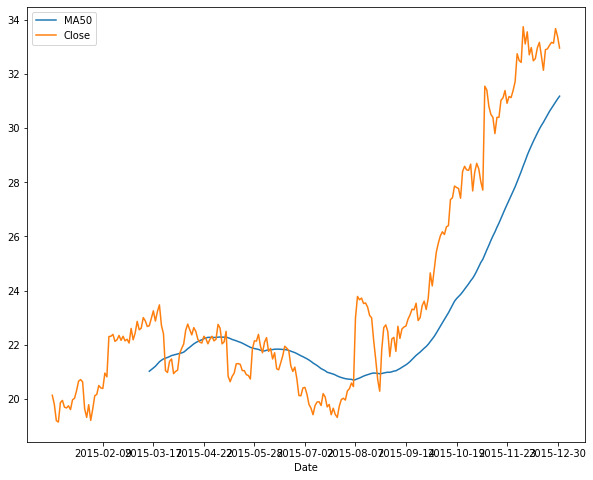

In [17]:

fb['ma50'] = fb['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

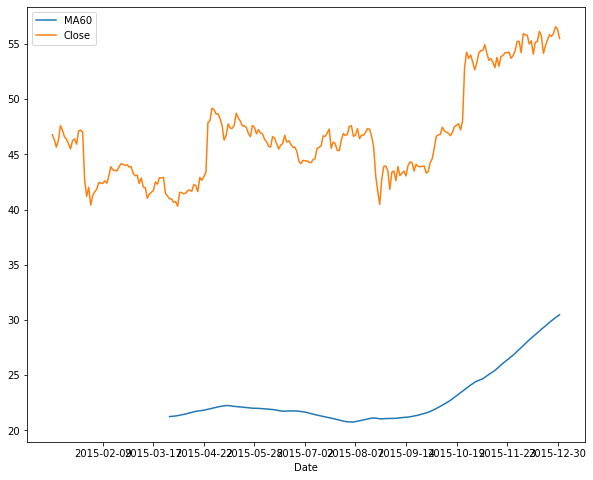

In [19]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = fb['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

** Expected Output: **

<img src="MA.png">